In [1]:
"""
Traffic Flow Prediction with Neural Networks(SAEs、LSTM、GRU).
"""
import math
import warnings
import numpy as np
import pandas as pd
from data.data import process_data
from keras.models import load_model
from keras.utils.vis_utils import plot_model
import sklearn.metrics as metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


def MAPE(y_true, y_pred):
    """Mean Absolute Percentage Error
    Calculate the mape.

    # Arguments
        y_true: List/ndarray, ture data.
        y_pred: List/ndarray, predicted data.
    # Returns
        mape: Double, result data for train.
    """

    y = [x for x in y_true if x > 0]
    y_pred = [y_pred[i] for i in range(len(y_true)) if y_true[i] > 0]

    num = len(y_pred)
    sums = 0

    for i in range(num):
        tmp = abs(y[i] - y_pred[i]) / y[i]
        sums += tmp

    mape = sums * (100 / num)

    return mape


def eva_regress(y_true, y_pred):
    """Evaluation
    evaluate the predicted resul.

    # Arguments
        y_true: List/ndarray, ture data.
        y_pred: List/ndarray, predicted data.
    """

    mape = MAPE(y_true, y_pred)
    vs = metrics.explained_variance_score(y_true, y_pred)
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    print('explained_variance_score:%f' % vs)
    print('mape:%f%%' % mape)
    print('mae:%f' % mae)
    print('mse:%f' % mse)
    print('rmse:%f' % math.sqrt(mse))
    print('r2:%f' % r2)


def plot_results(y_true, y_preds, names):
    """Plot
    Plot the true data and predicted data.

    # Arguments
        y_true: List/ndarray, ture data.
        y_pred: List/ndarray, predicted data.
        names: List, Method names.
    """
    d = '2016-3-4 00:00'
    x = pd.date_range(d, periods=288, freq='5min')

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.plot(x, y_true, label='True Data')
    for name, y_pred in zip(names, y_preds):
        ax.plot(x, y_pred, label=name)

    plt.legend()
    plt.grid(True)
    plt.xlabel('Time of Day')
    plt.ylabel('Flow')

    date_format = mpl.dates.DateFormatter("%H:%M")
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()

    plt.show()


def main():
    lstm = load_model('model/lstm.h5')
    gru = load_model('model/gru.h5')
    saes = load_model('model/saes.h5')
    models = [lstm, gru, saes]
    names = ['LSTM', 'GRU', 'SAEs']

    lag = 12
    file1 = 'data/train.csv'
    file2 = 'data/test.csv'
    _, _, X_test, y_test, scaler = process_data(file1, file2, lag)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(1, -1)[0]

    y_preds = []
    for name, model in zip(names, models):
        if name == 'SAEs':
            X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
        else:
            X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        file = 'images/' + name + '.png'
        plot_model(model, to_file=file, show_shapes=True)
        predicted = model.predict(X_test)
        predicted = scaler.inverse_transform(predicted.reshape(-1, 1)).reshape(1, -1)[0]
        y_preds.append(predicted[:288])
        print(name)
        eva_regress(y_test, predicted)

    plot_results(y_test[: 288], y_preds, names)


if __name__ == '__main__':
    main()


ModuleNotFoundError: No module named 'keras'

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
135/135 [==============================] - 2s 7ms/step
LSTM
explained_variance_score:0.930194
mape:26.028704%
mae:7.958360
mse:113.616401
rmse:10.659099
r2:0.930058
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
135/135 [==============================] - 2s 5ms/step
GRU
explained_variance_score:0.930356
mape:27.457394%
mae:7.954970
mse:113.379091
rmse:10.647962
r2:0.930204
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
135/135 [==============================] - 1s 3ms/step
SAEs
explained_variance_score:0.944269
mape:17.801078%
mae:7.058258
mse:92.077206
rmse:9.595687
r2:0.943318


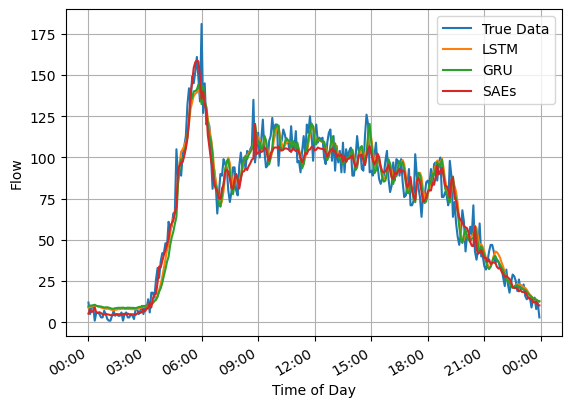

In [3]:
"""
Traffic Flow Prediction with Neural Networks(SAEs、LSTM、GRU).
"""
import math
import warnings
import numpy as np
import pandas as pd
from data.data import process_data
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
import sklearn.metrics as metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


def MAPE(y_true, y_pred):
    """Mean Absolute Percentage Error
    Calculate the mape.

    # Arguments
        y_true: List/ndarray, ture data.
        y_pred: List/ndarray, predicted data.
    # Returns
        mape: Double, result data for train.
    """

    y = [x for x in y_true if x > 0]
    y_pred = [y_pred[i] for i in range(len(y_true)) if y_true[i] > 0]

    num = len(y_pred)
    sums = 0

    for i in range(num):
        tmp = abs(y[i] - y_pred[i]) / y[i]
        sums += tmp

    mape = sums * (100 / num)

    return mape


def eva_regress(y_true, y_pred):
    """Evaluation
    evaluate the predicted resul.

    # Arguments
        y_true: List/ndarray, ture data.
        y_pred: List/ndarray, predicted data.
    """

    mape = MAPE(y_true, y_pred)
    vs = metrics.explained_variance_score(y_true, y_pred)
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    print('explained_variance_score:%f' % vs)
    print('mape:%f%%' % mape)
    print('mae:%f' % mae)
    print('mse:%f' % mse)
    print('rmse:%f' % math.sqrt(mse))
    print('r2:%f' % r2)


def plot_results(y_true, y_preds, names):
    """Plot
    Plot the true data and predicted data.

    # Arguments
        y_true: List/ndarray, ture data.
        y_pred: List/ndarray, predicted data.
        names: List, Method names.
    """
    d = '2016-3-4 00:00'
    x = pd.date_range(d, periods=288, freq='5min')

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.plot(x, y_true, label='True Data')
    for name, y_pred in zip(names, y_preds):
        ax.plot(x, y_pred, label=name)

    plt.legend()
    plt.grid(True)
    plt.xlabel('Time of Day')
    plt.ylabel('Flow')

    date_format = mpl.dates.DateFormatter("%H:%M")
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()

    plt.show()


def main():
    lstm = load_model('model/lstm.h5')
    gru = load_model('model/gru.h5')
    saes = load_model('model/saes.h5')
    models = [lstm, gru, saes]
    names = ['LSTM', 'GRU', 'SAEs']

    lag = 12
    file1 = 'data/train.csv'
    file2 = 'data/test.csv'
    _, _, X_test, y_test, scaler = process_data(file1, file2, lag)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(1, -1)[0]

    y_preds = []
    for name, model in zip(names, models):
        if name == 'SAEs':
            X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
        else:
            X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        file = 'images/' + name + '.png'
        plot_model(model, to_file=file, show_shapes=True)
        predicted = model.predict(X_test)
        predicted = scaler.inverse_transform(predicted.reshape(-1, 1)).reshape(1, -1)[0]
        y_preds.append(predicted[:288])
        print(name)
        eva_regress(y_test, predicted)

    plot_results(y_test[: 288], y_preds, names)


if __name__ == '__main__':
    main()

In [4]:
!pip install pydot


Defaulting to user installation because normal site-packages is not writeable


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
135/135 [==============================] - 1s 5ms/step
LSTM
explained_variance_score:0.930194
mape:26.028704%
mae:7.958360
mse:113.616401
rmse:10.659099
r2:0.930058
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
135/135 [==============================] - 1s 4ms/step
GRU
explained_variance_score:0.930356
mape:27.457394%
mae:7.954970
mse:113.379091
rmse:10.647962
r2:0.930204
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
135/135 [==============================] - 0s 2ms/step
SAEs
explained_variance_score:0.944269
mape:17.801078%
mae:7.058258
mse:92.077206
rmse:9.595687
r2:0.943318


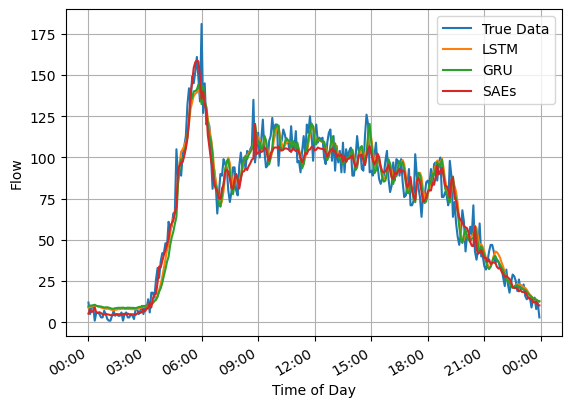

In [5]:
"""
Traffic Flow Prediction with Neural Networks(SAEs、LSTM、GRU).
"""
import math
import warnings
import numpy as np
import pandas as pd
from data.data import process_data
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
import sklearn.metrics as metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


def MAPE(y_true, y_pred):
    """Mean Absolute Percentage Error
    Calculate the mape.

    # Arguments
        y_true: List/ndarray, ture data.
        y_pred: List/ndarray, predicted data.
    # Returns
        mape: Double, result data for train.
    """

    y = [x for x in y_true if x > 0]
    y_pred = [y_pred[i] for i in range(len(y_true)) if y_true[i] > 0]

    num = len(y_pred)
    sums = 0

    for i in range(num):
        tmp = abs(y[i] - y_pred[i]) / y[i]
        sums += tmp

    mape = sums * (100 / num)

    return mape


def eva_regress(y_true, y_pred):
    """Evaluation
    evaluate the predicted resul.

    # Arguments
        y_true: List/ndarray, ture data.
        y_pred: List/ndarray, predicted data.
    """

    mape = MAPE(y_true, y_pred)
    vs = metrics.explained_variance_score(y_true, y_pred)
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    print('explained_variance_score:%f' % vs)
    print('mape:%f%%' % mape)
    print('mae:%f' % mae)
    print('mse:%f' % mse)
    print('rmse:%f' % math.sqrt(mse))
    print('r2:%f' % r2)


def plot_results(y_true, y_preds, names):
    """Plot
    Plot the true data and predicted data.

    # Arguments
        y_true: List/ndarray, ture data.
        y_pred: List/ndarray, predicted data.
        names: List, Method names.
    """
    d = '2016-3-4 00:00'
    x = pd.date_range(d, periods=288, freq='5min')

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.plot(x, y_true, label='True Data')
    for name, y_pred in zip(names, y_preds):
        ax.plot(x, y_pred, label=name)

    plt.legend()
    plt.grid(True)
    plt.xlabel('Time of Day')
    plt.ylabel('Flow')

    date_format = mpl.dates.DateFormatter("%H:%M")
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()

    plt.show()


def main():
    lstm = load_model('model/lstm.h5')
    gru = load_model('model/gru.h5')
    saes = load_model('model/saes.h5')
    models = [lstm, gru, saes]
    names = ['LSTM', 'GRU', 'SAEs']

    lag = 12
    file1 = 'data/train.csv'
    file2 = 'data/test.csv'
    _, _, X_test, y_test, scaler = process_data(file1, file2, lag)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(1, -1)[0]

    y_preds = []
    for name, model in zip(names, models):
        if name == 'SAEs':
            X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
        else:
            X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        file = 'images/' + name + '.png'
        plot_model(model, to_file=file, show_shapes=True)
        predicted = model.predict(X_test)
        predicted = scaler.inverse_transform(predicted.reshape(-1, 1)).reshape(1, -1)[0]
        y_preds.append(predicted[:288])
        print(name)
        eva_regress(y_test, predicted)

    plot_results(y_test[: 288], y_preds, names)


if __name__ == '__main__':
    main()